<a href="https://colab.research.google.com/github/thanadolch/KKU_data_mining/blob/master/Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## เรื่อง การทำ Association เพื่อหาความสัมพันธ์ของการดูหนัง


### link for download dataset
- https://www.kaggle.com/zeeshanmulla/recommendation-system-movie
- https://www.kaggle.com/pradyut23/movies


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material'

In [ ]:
import os

In [ ]:
RM = os.path.join(path,'Recommendation System.csv')

###1.ขั้นตอนการเตรียมข้อมูล


In [ ]:
colname = ['user_id','item_id','rating','timestamp']

In [ ]:
RM_Table = pd.read_csv(RM,names=colname)

In [ ]:
RM_Table  #ผลของการแก้เพิ่มเติมจากการ Comment ในเรื่อง ข้อมูลเเถวเเรกที่ขาดหายไป

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [ ]:
Movie = os.path.join(path,'Movie_Id_Titles')

In [ ]:
Movie_Table = pd.read_csv(Movie)
Movie_Table

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
df = pd.merge(RM_Table,Movie_Table,on='item_id') #เพื่อรวมตารางโดยใช้ item_id เป็น key 
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
df.isnull().any() #เพื่อตรวจสอบ Missing

user_id      False
item_id      False
rating       False
timestamp    False
title        False
dtype: bool

###2. ขั้นตอนการวิเคราะห์โดยการ association

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori #เพื่อใช้คำสั่ง apriori

In [ ]:
asso = df.groupby('user_id')['title'].apply(list)
list(apriori(asso,min_support=0.3,min_confidence=0.99))

[RelationRecord(items=frozenset({'Star Wars (1977)', 'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), support=0.3336864406779661, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9936908517350158, lift=1.6062400069141352)]),
 RelationRecord(items=frozenset({'Star Wars (1977)', 'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)'}), support=0.3114406779661017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9966101694915255, lift=1.610958904109589)])]

### จากผลการ Association ของ ชื่อหนังกับคนดู พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .3
- ค่า confidence ที่เยอะที่สุดคือ .99
- โดย คนที่ดูหนังเรื่อง Return of the Jedi (1983), Raiders of the Lost Ark (1981),The Empire Strikes Back (1980) มีโอกาสที่จะดูหนังเรื่อง Star Wars (1977) ถึง 99%

### 3.ปรับแก้เพิ่มเติมตาม Comment ของอาจารย์
- เพิ่ม ผลของ การ Association ถ้าหา ratiing น้อยกว่าเเละมากกว่า 3 
- เพิ่ม ประเภทของหนัง เพื่อ ดูผลการ Association ของประเภทของหนัง

In [ ]:
df_new = os.path.join(path,'movies.csv')
df_new = pd.read_csv(df_new)
df_new

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34179,151697,Grand Slam (1967),Thriller
34180,151701,Bloodmoney (2010),(no genres listed)
34181,151703,The Butterfly Circus (2009),Drama
34182,151709,Zero (2015),Drama|Sci-Fi


In [ ]:
df_merge_table = pd.merge(df_new,df,on='title') #รวมตาราง ใช้ title เป็น key 
df_merge_table

,movieId,title,genres,user_id,item_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,308,1,4,887736532
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,287,1,5,875334088
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,148,1,4,877019411
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,280,1,4,891700426
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,66,1,3,883601324
...,...,...,...,...,...,...,...
88923,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,429,587,3,882386895
88924,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,551,587,4,892783525
88925,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,94,587,4,891721078
88926,6531,"Hour of the Pig, The (1993)",Crime|Drama|Mystery,896,587,3,887159603


In [ ]:
df_merge_table = df_merge_table[['user_id','item_id','rating','timestamp','title','genres']] #เรียงลำดับ column เพื่อดูง่ายขึ้น
df_merge_table

,user_id,item_id,rating,timestamp,title,genres
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
88923,429,587,3,882386895,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88924,551,587,4,892783525,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88925,94,587,4,891721078,"Hour of the Pig, The (1993)",Crime|Drama|Mystery
88926,896,587,3,887159603,"Hour of the Pig, The (1993)",Crime|Drama|Mystery


In [ ]:
df_merge_table.shape

(88928, 6)

In [ ]:
df['genres'] = df['title'].map(df_new.set_index('title')['genres']) # ต่อ colomn genres ในตาราง ให้ title เป็น key เพื่อดู NaN เพราะ การ merge จะตัดข้อมูลที่ missing ออก
df

,user_id,item_id,rating,timestamp,title,genres
0,0,50,5,881250949,Star Wars (1977),NaN
1,290,50,5,880473582,Star Wars (1977),NaN
2,79,50,4,891271545,Star Wars (1977),NaN
3,2,50,5,888552084,Star Wars (1977),NaN
4,8,50,5,879362124,Star Wars (1977),NaN
...,...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962),Drama
99999,655,1640,3,888474646,"Eighth Day, The (1996)",NaN
100000,655,1637,3,888984255,Girls Town (1996),Comedy|Drama
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",NaN


In [ ]:
df.shape

(100003, 6)

In [ ]:
action = []                                          # วนลูบ เพื่อ หาชื่อหนังที่ มีประเภทหนังเป็น NaN
for i in range(0,len(df)):                       # กำหนดตัวแปร action เพื่อเก็บข้อมูลจากการวนลูบ
  # if(df["genres"]                               # ตัวแปร data เก็บข้อมูล column genres ที่เปลี่ยน type ให้เป็น string ทั้งหมด 
  data = str(df["genres"][i])                  # วนลูบ เพื่อหา ตัวแปร data ที่มี NaN เเล้วแสดงชื่อ หนัง ที่มี ประเภทเป็น NaN ออกมา 
  if(data=="nan"):
    print(df["title"][i])
    action.append(df["title"][i])

Streaming output truncated to the last 5000 lines.
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*S*H (1970)
M*A*

### เติมข้อมูลประเภทหนังที่ NaN ตามชื่อหนัง โดยข้อมูลหามาจากการ ค้นหาชื่อหนังเเต่ละเรื่องใน Google 


In [ ]:
E = df[df['title']=='Empire Strikes Back, The (1980)']
io = E.fillna('action sci fi')

In [ ]:
st = df[df['title']=='Star Wars (1977)']
st = st.fillna('action sci fi')

In [ ]:
Mo = df[df['title']=='Monty Python and the Holy Grail (1974)']
Mo = Mo.fillna('Adventure, Comedy, Fantasy')

In [ ]:
Mrs = df[df['title']=='Mrs. Brown (Her Majesty, Mrs. Brown) (1997)']
Mrs = Mrs.fillna('Biography, Drama, History')

In [ ]:
Pro = df[df['title']=='Professional, The (1994)']
Pro = Pro.fillna('Action, Crime, Drama')

In [ ]:
Ind = df[df['title']=='Independence Day (ID4) (1996)']
Ind = Ind.fillna('Action, Adventure, Sci-Fi')

In [ ]:
Bea = df[df['title']=='Beavis and Butt-head Do America (1996)']
Bea = Bea.fillna('Animation, Adventure, Comedy')

In [ ]:
Red = df[df['title']=='Red Firecracker, Green Firecracker (1994)']
Red = Red.fillna('Life,romance')

In [ ]:
Ko = df[df['title']=='Kolya (1996)']
Ko = Ko.fillna('Comedy, Drama, Music')

In [ ]:
He = df[df['title']=='Heavyweights (1994)']
He = He.fillna('Comedy,Drama,Family')

In [ ]:
Dr = df[df['title']=='Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)']
Dr = Dr.fillna('Science Fiction, Drama, Comedy, Action')

In [ ]:
Men = df[df['title']=='Men in Black (1997)']
Men = Men.fillna('Action, Adventure, Comedy')

In [ ]:
Evil = df[df['title']=='Evil Dead II (1987)']
Evil = Evil.fillna('Action, Comedy, Fantasy')

In [ ]:
Ret = df[df['title']=='Return of the Jedi (1983)']
Ret = Ret.fillna('Action, Adventure, Fantasy')

In [ ]:
Con = df[df['title']=='Conan the Barbarian (1981)']
Con = Con.fillna('Action, Adventure, Fantasy')

In [ ]:
Boot = df[df['title']=='Boot, Das (1981)']
Boot = Boot.fillna('Adventure, Drama, Thriller')

In [ ]:
City = df[df['title']=='City of Lost Children, The (1995)']
City = City.fillna('Adventure, Drama, Thriller')

In [ ]:
Win = df[df['title']=='Wings of Desire (1987)']
Win = Win.fillna('Fantasy,Romance')

In [ ]:
Rai = df[df['title']=='Raiders of the Lost Ark (1981)']
Rai = Rai.fillna('Action, Adventure')

In [ ]:
Will = df[df['title']=='Willy Wonka and the Chocolate Factory (1971)']
Will = Will.fillna('Family, Fantasy, Musical')

In [ ]:
Tales = df[df['title']=='Tales From the Crypt Presents: Demon Knight (1995)']
Tales = Tales.fillna('Action, Fantasy, Horror')

In [ ]:
Postino = df[df['title']=='Postino, Il (1994)']
Postino = Postino.fillna('Biography, Comedy, Drama')

In [ ]:
Close = df[df['title']=='Close Shave, A (1995)']
Close = Close.fillna('Animation, Short, Comedy')

In [ ]:
interview = df[df['title']=='Interview with the Vampire (1994)']
interview = interview.fillna('Drama, Horror')

In [ ]:
God = df[df['title']=='Good, The Bad and The Ugly, The (1966)']
God = God.fillna('Western')

In [ ]:
Ghost = df[df['title']=='Ghost in the Shell (Kokaku kidotai) (1995)']
Ghost = Ghost.fillna('Animation, Action, Crime')

In [ ]:
Jackie = df[df['title']=='Three Colors: White (1994)']
Jackie = Jackie.fillna('Comedy, Drama, Romance')

In [ ]:
Shave = df[df['title']=='Close Shave, A (1995)']
Shave = Shave.fillna('Animation, Short, Comedy')

In [ ]:
Star = df[df['title']=='Star Trek: The Wrath of Khan (1982)']
Star = Star.fillna('Action, Adventure, Sci-Fi')

In [ ]:
Pink = df[df['title']=='Pink Floyd - The Wall (1982)']
Pink = Pink.fillna('Drama, Fantasy, Music')

In [ ]:
Twelve = df[df['title']=='Twelve Monkeys (1995)']
Twelve = Twelve.fillna('Mystery, Sci-Fi, Thriller')

In [ ]:
Seven = df[df['title']=='Seven (Se7en) (1995)']
Seven = Seven.fillna('Crime, Drama, Mystery')

In [ ]:
Nikita = df[df['title']=='Nikita (La Femme Nikita) (1990)']
Nikita = Nikita.fillna('Action,Thriller')

In [ ]:
Grand = df[df['title']=='Grand Day Out, A (1992)']
Grand = Grand.fillna('Animation,Short,Adventure')

In [ ]:
When = df[df['title']=='When the Cats Away (Chacun cherche son chat) (1996)']
When = When.fillna('Comedy, Romance')

In [ ]:
Wrong = df[df['title']=='Wrong Trousers, The (1993)']
Wrong = Wrong.fillna('Animation, Short, Comedy')

In [ ]:
Like = df[df['title']=='Like Water For Chocolate (Como agua para chocolate) (1992)']
Like = Like.fillna('Drama, Romance')

In [ ]:
Panther = df[df['title']=='Return of the Pink Panther, The (1974)']
Panther = Panther.fillna('Comedy, Crime, Mystery') 

In [ ]:
Blue = df[df['title']=='Three Colors: Blue (1993)']
Blue = Blue.fillna('Drama, Music, Mystery') 

In [ ]:
MASH = df[df['title']=='M*A*S*H (1970)']
MASH = MASH.fillna('Comedy, Drama, War')

In [ ]:
GoodFellas = df[df['title']=='GoodFellas (1990)']
GoodFellas = GoodFellas.fillna('Biography, Crime, Drama')

In [ ]:
Wars = df[df['title']=='Star Wars (1977)']
Wars = Wars.fillna('Action, Adventure, Fantasy')

In [ ]:
Data_set = pd.concat([df_merge_table,io,Ko,He,Dr,Men,Evil,Ret,Con,Boot,City,Win,Rai,Will,Tales,Postino,Close,interview,God,Ghost,Jackie,Shave,Star,Pink,Twelve,Seven,Nikita,Grand,When,Wrong,Like,Panther,Blue,MASH,GoodFellas,Wars])
Data_set    # การต่อตารางที่ทำการเติมค่า missing ทั้งหมด กับตารางที่ทำการ merge เพื่อเตรียมทำ Association

,user_id,item_id,rating,timestamp,title,genres
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
579,749,50,5,878846978,Star Wars (1977),"Action, Adventure, Fantasy"
580,886,50,5,876031501,Star Wars (1977),"Action, Adventure, Fantasy"
581,739,50,4,886958895,Star Wars (1977),"Action, Adventure, Fantasy"
582,903,50,5,891031329,Star Wars (1977),"Action, Adventure, Fantasy"


In [ ]:
association = Data_set.groupby('user_id')['title'].apply(list)
list(apriori(association,min_support=0.33,min_confidence=0.99))

[RelationRecord(items=frozenset({'Star Wars (1977)', 'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), support=0.3336864406779661, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9936908517350158, lift=1.6062400069141352)])]

### จากผลการ Association ของ ชื่อหนังกับคนดู พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .3
- ค่า confidence ที่เยอะที่สุดคือ .99
- โดย คนที่ดูหนังเรื่อง Return of the Jedi (1983),The Empire Strikes Back (1980) มีโอกาสที่จะดูหนังเรื่อง Star Wars (1977) ถึง 99%

### 3. วิเคราะห์เพื่อหาความสัมพันธ์ของ user_id กับ title โดยที่ต้องมี rating มากว่าหรือเท่ากับ 3

In [ ]:
df_rating_uper3 = Data_set[Data_set['rating']>=3]
df_rating_uper3

,user_id,item_id,rating,timestamp,title,genres,clus
0,308,1,4,887736532,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,287,1,5,875334088,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
2,148,1,4,877019411,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
3,280,1,4,891700426,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
4,66,1,3,883601324,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
...,...,...,...,...,...,...,...
579,749,50,5,878846978,Star Wars (1977),"Action, Adventure, Fantasy",0
580,886,50,5,876031501,Star Wars (1977),"Action, Adventure, Fantasy",0
581,739,50,4,886958895,Star Wars (1977),"Action, Adventure, Fantasy",0
582,903,50,5,891031329,Star Wars (1977),"Action, Adventure, Fantasy",0


In [ ]:
Rating = df_rating_uper3.groupby('user_id')['title'].apply(list)
list(apriori(Rating,min_support=0.3,min_confidence=0.98))

[RelationRecord(items=frozenset({'Star Wars (1977)', 'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), support=0.3103813559322034, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)'}), items_add=frozenset({'Star Wars (1977)'}), confidence=0.9898648648648649, lift=1.671614369288788)])]

### จากผลการ Association ของ ชื่อหนังกับคนดู โดย ที่หนังมี rating มากกว่าหรือเท่ากับ 3 พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .3
- ค่า confidence ที่เยอะที่สุดคือ .989
- โดย คนที่ดูหนังเรื่อง Return of the Jedi (1983), The Empire Strikes Back (1980) มีโอกาสที่จะดูหนังเรื่อง Star Wars (1977) ถึง 99%

### 4. วิเคราะห์เพื่อหาความสัมพันธ์ของ user_id กับ title โดยที่ต้องมี rating น้อยกว่า 3

In [ ]:
df_rating_lower3  = Data_set[Data_set['rating']<3]
df_rating_lower3

,user_id,item_id,rating,timestamp,title,genres,clus
18,49,1,2,888068651,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
26,213,1,2,878870719,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
49,322,1,2,887314119,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
53,204,1,2,892513979,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
58,15,1,1,879455635,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
...,...,...,...,...,...,...,...
452,765,50,2,880346255,Star Wars (1977),"Action, Adventure, Fantasy",1
486,745,50,2,880122928,Star Wars (1977),"Action, Adventure, Fantasy",1
500,566,50,2,881650063,Star Wars (1977),"Action, Adventure, Fantasy",1
527,183,50,2,891467546,Star Wars (1977),"Action, Adventure, Fantasy",1


In [ ]:
Ratinglow = df_rating_lower3.groupby('user_id')['title'].apply(list)
list(apriori(Ratinglow,min_support=0.01,min_confidence=0.8))

[RelationRecord(items=frozenset({'Bean (1997)', 'Scream (1996)', 'Liar Liar (1997)'}), support=0.010976948408342482, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bean (1997)', 'Scream (1996)'}), items_add=frozenset({'Liar Liar (1997)'}), confidence=0.8333333333333334, lift=6.326388888888889)])]

### จากผลการ Association ของ ชื่อหนังกับคนดู โดย ที่หนังมี rating น้อยกว่า 3 พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .01
- ค่า confidence ที่เยอะที่สุดคือ .83
- โดย คนที่ดูหนังเรื่อง Bean (1997), Scream (1996) มีโอกาสที่จะดูหนังเรื่อง Liar Liar (1997) ถึง 83%

###5.ขั้นตอนการทำ Association ของประเภทหนัง

In [ ]:
genres = Data_set.groupby('user_id')['genres'].apply(list) #จัดกลุ่มประเภทของหนัง ตาม user_id ให้ user_id เป็น transaction เเละให้  genres เป็น item 
genres

user_id
0      [Drama|Romance|War, action sci fi, Action, Adv...
1      [Adventure|Animation|Children|Comedy|Fantasy, ...
2      [Adventure|Animation|Children|Comedy|Fantasy, ...
3      [Drama, Drama|War, Comedy|Musical|Romance, Doc...
4      [Drama|Mystery|Thriller, Drama, Action|Adventu...
                             ...                        
939    [Comedy|Romance, Comedy, Comedy|Romance, Drama...
940    [Comedy|Drama|Romance, Comedy|Crime|Thriller, ...
941    [Adventure|Animation|Children|Comedy|Fantasy, ...
942    [Comedy|Romance, Drama|Thriller|War, Adventure...
943    [Comedy|Romance, Comedy, Comedy|Romance, Actio...
Name: genres, Length: 944, dtype: object

###ผลของการ Association
### oneitemset

In [ ]:
list(apriori(genres,min_support=0.9,min_confidence=0.92))

[RelationRecord(items=frozenset({'Comedy'}), support=0.9226694915254238, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Comedy'}), confidence=0.9226694915254238, lift=1.0)])]

### จากผลการ Association ของ ประภทหนังกับคนดู พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .9
- ค่า confidence ที่เยอะที่สุดคือ .92
- ส่วนใหญ่คนจะดูหนังประเภท  Comedy ซึ่งคนมีดูถึง 92%

### twoitemset

In [ ]:
list(apriori(genres,min_support=0.8,min_confidence=0.94))

[RelationRecord(items=frozenset({'Comedy', 'Drama|Romance'}), support=0.847457627118644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Drama|Romance'}), items_add=frozenset({'Comedy'}), confidence=0.9400705052878966, lift=1.0188594224934264)])]

### จากผลการ Association ของ ประภทหนังกับคนดู พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .8
- ค่า confidence ที่เยอะที่สุดคือ .94
- โดย คนที่ดูหนังประเภท Drama|Romance มีโอกาสที่ดูหนังประเภท Comedy ถึง 92%

###6.ขั้นตอนการทำ Association โดยให้ประเภทของหนังเเค่ 2 ประเภท คือ
- Comedy
- Drama|Romance

In [ ]:
data_genres = Data_set[Data_set['genres']=='Comedy']
data_genres1 = Data_set[Data_set['genres']=='Drama|Romance']

In [ ]:
df_genres = pd.concat([data_genres,data_genres1]) # ต่อตาราง data_genres กับ data_genres1 เข้าด้วยกัน
df_genres

,user_id,item_id,rating,timestamp,title,genres,clus
712,244,756,2,880605157,Father of the Bride Part II (1995),Comedy,1
713,104,756,2,888465739,Father of the Bride Part II (1995),Comedy,1
714,82,756,1,878768741,Father of the Bride Part II (1995),Comedy,1
715,145,756,2,885557506,Father of the Bride Part II (1995),Comedy,1
716,238,756,3,883576476,Father of the Bride Part II (1995),Comedy,1
...,...,...,...,...,...,...,...
88055,13,905,2,886302261,Great Expectations (1998),Drama|Romance,1
88056,711,905,3,886559521,Great Expectations (1998),Drama|Romance,1
88057,871,905,3,888192744,Great Expectations (1998),Drama|Romance,1
88058,782,905,4,891498791,Great Expectations (1998),Drama|Romance,0


In [ ]:
asso_genres = df_genres.groupby('user_id')['title'].apply(list) #จัดกลุ่มประเภทของหนัง ตาม user_id ให้ user_id เป็น transaction เเละให้ title เป็น item 
asso_genres

user_id
1      [Four Rooms (1995), Birdcage, The (1996), Brot...
2      [Birdcage, The (1996), Fierce Creatures (1997)...
3      [Mother (1996), Liar Liar (1997), How to Be a ...
4                    [Liar Liar (1997), In & Out (1997)]
5      [Ace Ventura: When Nature Calls (1995), Bio-Do...
                             ...                        
939    [Father of the Bride Part II (1995), Mr. Wrong...
940    [Bullets Over Broadway (1994), Cold Comfort Fa...
941    [Happy Gilmore (1996), Waiting for Guffman (19...
942    [My Favorite Year (1982), Wag the Dog (1997), ...
943    [Father of the Bride Part II (1995), Happy Gil...
Name: title, Length: 922, dtype: object

In [ ]:
list(apriori(asso_genres,min_support=0.2,min_confidence=0.69))

[RelationRecord(items=frozenset({'Jerry Maguire (1996)', 'Birdcage, The (1996)'}), support=0.22234273318872017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Birdcage, The (1996)'}), items_add=frozenset({'Jerry Maguire (1996)'}), confidence=0.6996587030716723, lift=1.6799096985210467)])]

### จากผลการ Association ของ ชื่อหนังของประเภทหนัง 2 ประเภทกับคนดู พบว่า 
- ค่า support ที่เยอะที่สุดหากเพิ่มมากกว่านี้จะไม่พบข้อมูล คือ .2
- ค่า confidence ที่เยอะที่สุดคือ .69
- โดย คนที่ดูหนังเรื่อง The Birdcagำ (1996) มีโอกาสดูหนังเรื่อง Jerry Maguire (1996) ถึง 69%

### ขั้นตอนการแบ่งกลุ่ม โดยวิธี Kmean (เพิ่มเติมโดยนักศึกษาเอง)

In [ ]:
y = Data_set[['rating']]
X = Data_set[['user_id']]

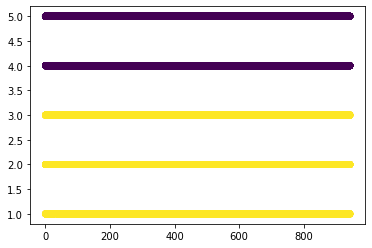

In [ ]:
from sklearn.cluster import KMeans
KMcluster = KMeans(n_clusters=2)
KMcluster.fit(y)
label = KMcluster.predict(y)
plt.scatter(X,y,c=label)

### จากผลการจัดกลุ่มของ rating ตั้งเเต่ 1 ถึง 5 พบว่า สามารถจำแนก rating ได้เป็น 2 กลุ่ม คือ
- 1. rating ที่ 4 ถึง 5 ตั้งชื่อให้เป้นกลุ่มที่มี rating มาก
- 2. rating ที่ 1 ถึง 3 ตั้งชื่อให้เป้นกลุ่มที่มี rating น้อย